In [1]:
# Importing packages

import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rw_df = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

# Data Exploration and Pre-processing

In [4]:
rw_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
rw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
rw_df.shape

(1599, 12)

Our dataset has 1599 rows and 12 columns.

## Dropping null values in qualtity 

In [7]:
rw = rw_df.dropna(subset = ["quality"])

In [8]:
rw.shape

(1599, 12)

No values were dropped as all observation have data in 'quality' column.

##Dropping duplicate values

In [9]:
rw.drop_duplicates(inplace=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


240 observations were dropped.

## Renaming the columns

In [10]:
rw.rename(columns = {'fixed acidity':'fixed_acidity', 
                     'volatile acidity':'volatile_acidity', 
                     'citric acid':'citric_acid', 
                     'residual sugar':'residual_sugar', 
                     'free sulfur dioxide':'free_sulfur_dioxide',
                     'total sulfur dioxide':'total_sulfur_dioxide'
                    }, inplace=True)

In [11]:
rw.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Since we are working on Python, renaming this way is better.

## Checking output values

In [12]:
# Checking unique values in outcome variable
rw.quality.unique()

array([5, 6, 7, 4, 8, 3])

Text(0, 0.5, 'count')

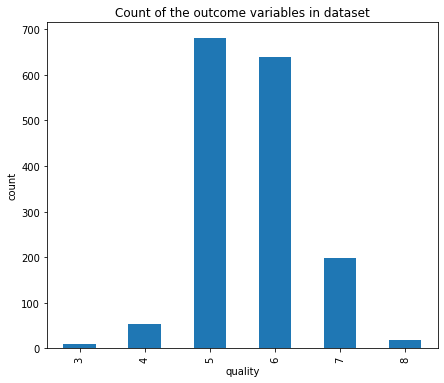

In [13]:
# Checking distribution of outcome variable
ax = rw.groupby(['quality'])['quality'].count().plot.bar(title="Count of the outcome variables in dataset", figsize=(7,6))
ax.set_ylabel('count')

We have six variables in the 'quality' column. We can see that highest frequency is in the 5 & 6 output.

##Categorizing the target variable to labels

We have categorized the output to 0 and 1.\
3, 4 and 5 has been categorized as 0, representing lower quality of wine.\
6, 7 and 8 has been categorized as 1, representing higher quality of wine.

In [14]:
rw['quality'] = rw.quality.apply(lambda x:1 if x>=6 else 0)

Text(0, 0.5, 'count')

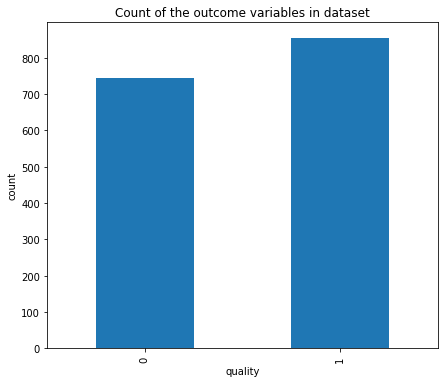

In [15]:
# Checking distribution of outcome variable
ax = rw.groupby(['quality'])['quality'].count().plot.bar(title="Count of the outcome variables in dataset", figsize=(7,6))
ax.set_ylabel('count')

#Train - Test Split 

In [16]:
X1 = rw.drop(['quality'], axis=1)

In [17]:
y1 = rw['quality']

In [18]:
train_X1, test_X1, train_y1, test_y1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

80% of data is assigned to Train and 20% is assigned to Test dataset.

In [19]:
# scaling data
sc = StandardScaler()
train_X1 = sc.fit_transform(train_X1)
test_X1 = sc.fit_transform(test_X1)

# Logistic Regression

In [20]:
lr = LogisticRegression(max_iter=500)
lr.fit(train_X1, train_y1)

LogisticRegression(max_iter=500)

In [21]:
pred_y1 = lr.predict(test_X1)
lr_accuracy = accuracy_score(test_y1, pred_y1)
print(f"Test Accuracy: {accuracy_score(train_y1, lr.predict(train_X1))}")
print(f"Train Accuracy: {lr_accuracy}\n")

Test Accuracy: 0.7521501172791243
Train Accuracy: 0.7375



The accuracy score in test is 75.22% which shows that our model is working well to predict the quality of wine in test data. \
The accuracy score has decresed to 73.75% in test data, which is still good. This shows that our model is doing good at prediction of quality of wine.

In [22]:
proba_y1 = lr.predict_proba(test_X1)

In [23]:
result = pd.DataFrame({'actual': test_y1, 
                             'p(0)': [p[0] for p in proba_y1],
                             'p(1)': [p[1] for p in proba_y1],
                             'predicted': pred_y1 })

In [24]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import scikitplot as skplt

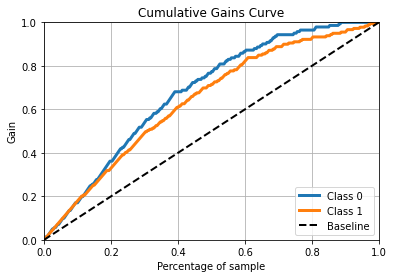

In [26]:
skplt.metrics.plot_cumulative_gain(test_y1, proba_y1)
plt.show()

We can see that there is a gap between the dotted line and the orange and blue line. This shows that our model 'logistic regression' is working well and is good at prediction.

In [27]:
import statsmodels.api as sm
logit_reg = sm.GLM(train_y1, train_X1, family=sm.families.Binomial())
logit_result = logit_reg.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                quality   No. Observations:                 1279
Model:                            GLM   Df Residuals:                     1268
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -666.75
Date:                Mon, 06 Feb 2023   Deviance:                       1333.5
Time:                        00:47:55   Pearson chi2:                 1.42e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1773      0.183      0.969      0.3

The most important variables for predicting the quality of wine are alcohol and sulphates. As these have highest coefficient, the odds ratio (e^coefficient) is greater which shows that these are the most important variables in predicting the good quality of wine.

# Random Forest

In [28]:
# Running the model in training dataset 
rf = RandomForestClassifier()
rf.fit(train_X1, train_y1)

RandomForestClassifier()

In [29]:
pred_y1 = rf.predict(test_X1)

In [30]:
print('Accuracy: ', metrics.accuracy_score(test_y1, pred_y1))

Accuracy:  0.784375


The accuracy is 79.06% which shows that our model is working well at predicting the quality of wine.

In [31]:
# Analysis through AUC-ROC curve
from sklearn.metrics import accuracy_score, roc_curve, auc
fpr, tpr, _ = roc_curve(test_y1, pred_y1)
roc_auc = auc(fpr, tpr)

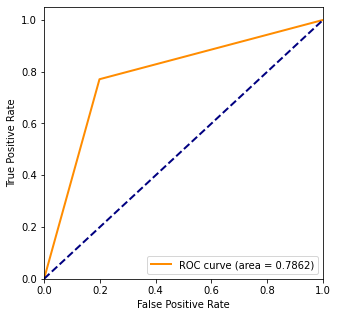

In [32]:
plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

The gap between orange line and dotted line is high so our model 'Random Forest' is working well and is good at prediction.

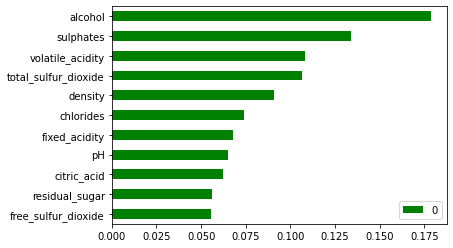

In [33]:
# Feature Importance
feature_imp = list(zip(rf.feature_importances_, X1.columns))
feature_imp.sort(reverse=False)

#plot feature importance
pd.DataFrame(feature_imp, index=[x for (_,x) in feature_imp]).plot(kind = 'barh', color='green')

The most important variables for predicting the quality of wine are alcohol, sulphate and volatile_acidity.

#Analysis

1. From both models, we can see that alcohol and sulphates have highest weightage in deciding the quality of wine. \
2. Random Forest has better accuracy than Logistic Regression so, we should move ahead with the Random Forest Analysis for future predictions on real data.